# Notebook Customer Support Enhancing Efficiency

 For this project we have some .txt file with a conversation between an agent and a customer. We can use it for some NLP, but the project is too poor and it will not be usefull with only 5 conversations. If the project was more complete it can be interesting to make some tag from conversation following with the column "Solution"

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("/Volumes/SSD 1/Github/Customer Support Enhancing Efficiency/Data/Historical_ticket_data.csv")

In [3]:
df.head(15)

,Ticket ID,Issue Category,Sentiment,Priority,Solution,Resolution Status,Date of Resolution
0,TECH_021,Software Installation Failure,Frustrated,High,Disable antivirus and retry installation,Resolved,2025-03-17
1,TECH_022,Software Installation Failure,Frustrated,High,Download from direct link,Resolved,2025-03-17
2,TECH_023,Software Installation Failure,Frustrated,High,Update to latest version of antivirus,Resolved,2025-03-17
3,TECH_024,Network Connectivity Issue,Confused,Medium,Check app permissions for Local Network,Resolved,2025-03-16
4,TECH_025,Network Connectivity Issue,Confused,Medium,Clear app cache and relog,Resolved,2025-03-16
5,TECH_026,Network Connectivity Issue,Confused,Medium,Reinstall the app,Resolved,2025-03-16
6,TECH_027,Device Compatibility Error,Annoyed,Critical,Rollback app to version 4.9,Resolved,2025-03-15
7,TECH_028,Device Compatibility Error,Annoyed,Critical,Offer a discount on a compatible thermostat,Resolved,2025-03-15
8,TECH_029,Device Compatibility Error,Annoyed,Critical,Contact thermostat support for an update,Resolved,2025-03-15
9,TECH_030,Account Synchronization Bug,Anxious,High,Reset sync token manually,Resolved,2025-03-14


We can already remove the column Resolution because all of them are "resolved", and the poor information of "Date of Resolution" is pretty not usefull, same as "ticket ID". 

In [4]:
df.columns.tolist()

['Ticket ID',
 ' Issue Category',
 ' Sentiment',
 ' Priority',
 ' Solution',
 ' Resolution Status',
 ' Date of Resolution']

In [5]:
to_drop = [" Resolution Status","Ticket ID", " Date of Resolution"]
df = df.drop(to_drop, axis=1)
df

,Issue Category,Sentiment,Priority,Solution
0,Software Installation Failure,Frustrated,High,Disable antivirus and retry installation
1,Software Installation Failure,Frustrated,High,Download from direct link
2,Software Installation Failure,Frustrated,High,Update to latest version of antivirus
3,Network Connectivity Issue,Confused,Medium,Check app permissions for Local Network
4,Network Connectivity Issue,Confused,Medium,Clear app cache and relog
5,Network Connectivity Issue,Confused,Medium,Reinstall the app
6,Device Compatibility Error,Annoyed,Critical,Rollback app to version 4.9
7,Device Compatibility Error,Annoyed,Critical,Offer a discount on a compatible thermostat
8,Device Compatibility Error,Annoyed,Critical,Contact thermostat support for an update
9,Account Synchronization Bug,Anxious,High,Reset sync token manually


For some reason, someone put a space at the start of the column for no reason.. good to always check with df.column.tolist() so you can copy paste the name of the column

In [6]:
group_sentiment = df.groupby([' Sentiment']).count()
group_priority = df.groupby([' Priority']).count()
group_Issue_Category= df.groupby([' Issue Category']).count()

Here it's useless to do it for solution, we can use lemmatization and tokennisation for it but for 15 rows that's useless

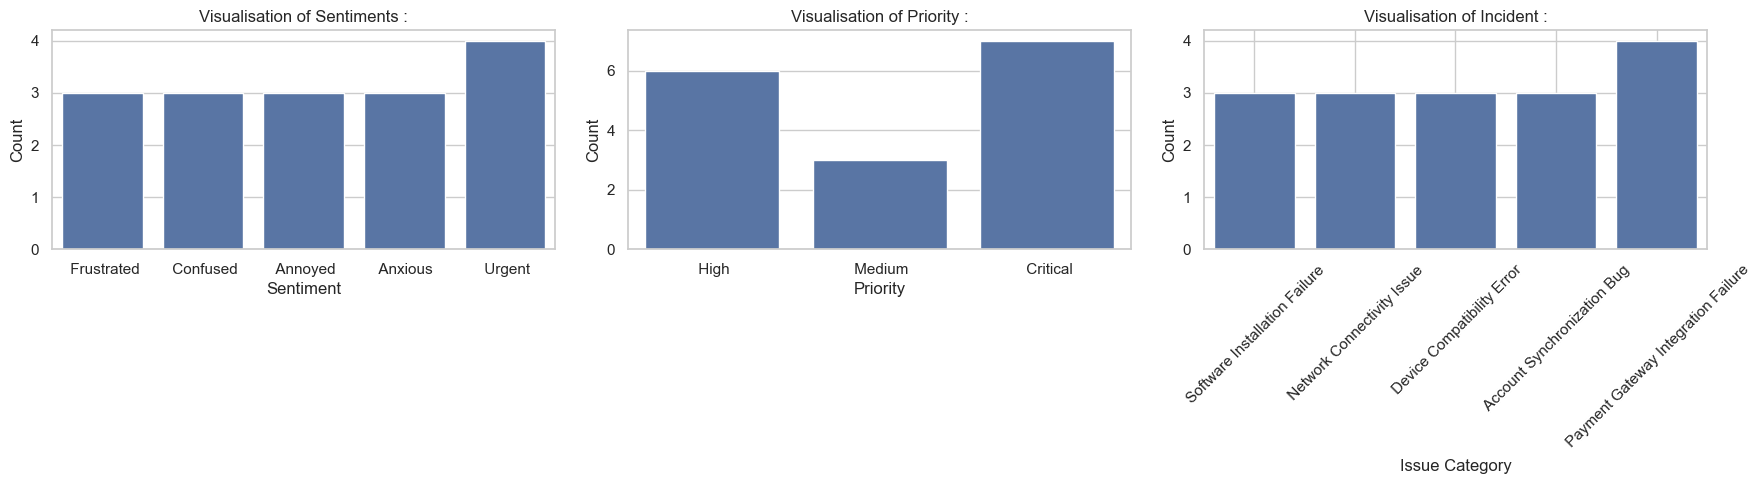

In [7]:
# style
sns.set(style="whitegrid")

# 2 lines
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#  column ' Sentiment'
sns.countplot(data=df, x=' Sentiment', ax=axes[0])
axes[0].set_title("Visualisation of Sentiments :")
axes[0].set_xlabel("Sentiment")
axes[0].set_ylabel("Count")

#  column  ' Priority'
sns.countplot(data=df, x=' Priority', ax=axes[1])
axes[1].set_title("Visualisation of Priority :")
axes[1].set_xlabel("Priority")
axes[1].set_ylabel("Count")

#  column  ' Issue Category'
sns.countplot(data=df, x=' Issue Category', ax=axes[2])
axes[2].set_title("Visualisation of Incident :")
axes[2].set_xlabel("Issue Category")
axes[2].set_ylabel("Count")
axes[2].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.grid(True)
plt.show()

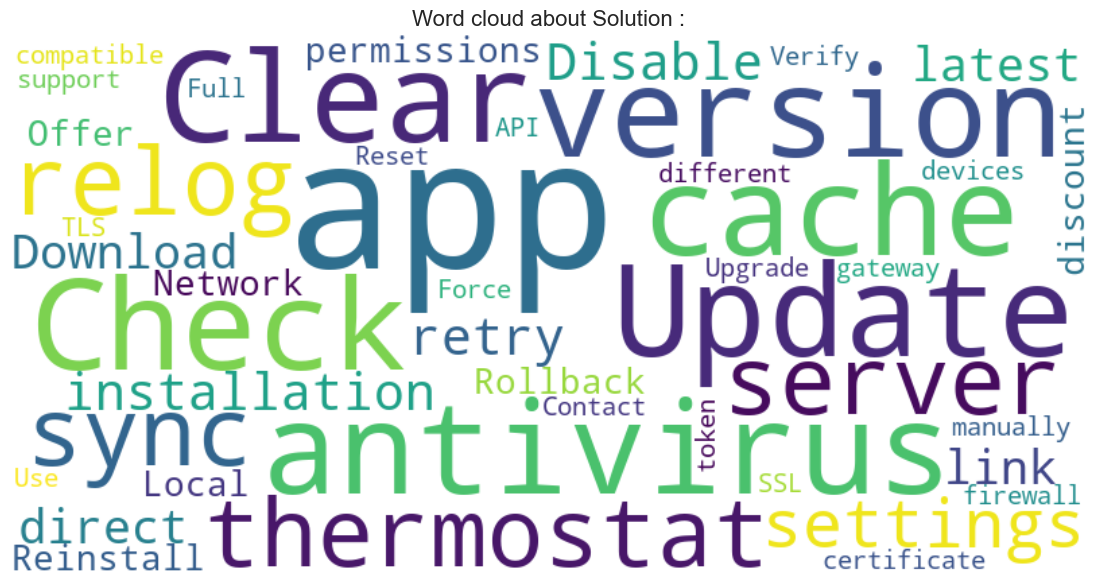

In [11]:
from wordcloud import WordCloud, STOPWORDS

text = " ".join(str(entry) for entry in df[' Solution'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=True).generate(text)

# Afficher le nuage de mots
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word cloud about Solution :", fontsize=16)
plt.show()

Conclusion :

The dataset is pretty poor. With much data, it can be interesting to use some NLP to detect the case and found a solution by Tag.
We can use some algorith to detect the case too depend of which case and how to resolve it, to provide directly an optimal solution.

Unfortunately, with 15 rows it's impossible to do that.

We have some chat with agent and customer. We need to be careful about GDPR, and we can tokennize it to found the best occurence.